#AdH SUPG formulation
Here, I'll try to document the essential features of the SUPG approach taken in AdH

#Formulation
Following [Berger and Stockstill, 1995], we consider the shallow water equations  variables 

\begin{align}
\vec U_t + \frac{\partial \vec F}{\partial x} + \frac{\partial \vec G}{\partial y} + \vec H = 0 
\end{align}
written in terms of the conservation variables
\begin{align}
\vec U = [h, p, q]^t = [h,hu,hv]^t
\end{align}
where $h$ is the water depth above a bottom elevation, $z$, $u$ is the velocity in the $x$ direction, and $y$ is the velocity in the $y$ direction. $p$ and $q$ are the corresponding discharges.
The flux vectors are
\begin{align}
\vec F &= 
\begin{array}{|c|}
p \\
\frac{p^2}{h} + \frac{1}{2}gh^2 -\frac{h\sigma_{xx} }{\rho} \\
\frac{pq}{h} -\frac{h\sigma_{yx}}{\rho}
\end{array}
\end{align}
and 
\begin{align}
\vec G &= 
\begin{array}{|c|}
q \\
\frac{pq}{h} -\frac{h\sigma_{xy}}{\rho} \\
\frac{q^2}{h} + \frac{1}{2}gh^2 -\frac{h\sigma_{yy} }{\rho} 
\end{array}
\end{align}
Here $g$ is the gravitational acceleration constant, $\rho$ is the fluid density (constant), and $\mathbf{\sigma}$ represents the Reynolds stresses due to turbulence which are written using a Boussinesq approximation as
\begin{align}
\sigma_{xx} &= 2\rho \nu \frac{\partial u}{\partial x}, \sigma_{yx}=\sigma_{xy} = \rho\nu\left(\frac{\partial u}{\partial y}+ \frac{\partial v}{\partial x}\right), \mbox{ and } \sigma_{yy} = 2 \rho\nu\frac{\partial v}{\partial y}
\end{align}
where $\nu$ is the kinematic eddy viscosity.
The source term $\vec H$ is
\begin{align}
\vec H &= 
\begin{array}{|c|}
-s_r \\
gh\frac{\partial z}{\partial x} + gp \frac{n^2(q^2+q^2)^{1/2}}{C_0^2h^{7/3}} \\
gh\frac{\partial z}{\partial y} + gq \frac{n^2(q^2+q^2)^{1/2}}{C_0^2h^{7/3}}
\end{array}
\end{align}
where $s_r$ is a rainfall rate, $n$ is Manning's roughness coefficient, and $C_0$ is a conversion coefficient (1.0 [m] or 1.486 [ft]).

#Galerkin approximation

AdH is implemented in terms of the primitive variables $h$, $u$, and $v$. It also assumes that the 'grid-scale' test and trial functions are taken from the space $W_h$ of nodal, piecewise linear functions defined on triangles. To be concrete, we start with a simple Galerkin procedure. We multiply each equation in the SW2D system by a test function $w \in W_h$ and integrate by parts and ignore boundary integrals, we get the problem: find $h$,$u$, and $v \in V_h=W_h$ such that

##Continuity
\begin{align}
(h_t,w)_{\Omega} - (h u,w_x)_{\Omega} - (h v, w_y)_{\Omega} - (s_r,w)_{\Omega}  &= 0
\end{align}

##$x$-momentum
\begin{align}
\left((hu)_t,w\right)_{\Omega} - \left(hu^2 + \frac{1}{2}gh^2,w_x\right)_{\Omega} - \left(huv,w_y\right)_{\Omega} + \left(2h\nu u_x,w_x\right)_{\Omega}  + \left(h\nu(u_y+u_x),w_y\right) + \left(ghz_x,w\right)_{\Omega} 
&= 0
\end{align}

##$y$-momentum
\begin{align}
\left((hv)_t,w\right)_{\Omega} - \left(hv^2 + \frac{1}{2}gh^2,w_y\right)_{\Omega} - \left(hvu,w_x\right)_{\Omega} + \left(2h\nu u_y,w_y\right)_{\Omega}  + \left(h\nu(u_y+u_x),w_x\right) + \left(ghz_y,w\right)_{\Omega} &= 0
\end{align}
for all $w \in W_h$,
where for brevity I've switched to the subscript notation $u_{x}$ to represent partial differentiation and 
\begin{align}
(a,b)_{\Omega} &= \int_{\Omega}a b \; \mathrm{d}\Omega
\end{align}
In the following, the integration domain for $(a,b)$ will be understood to be $\Omega$ unless specified explicitly.

#Stabilized approximation
AdH uses a Petrov-Galerkin (SUPG) approximation. [Berger and Stockstill, 1995] write the modified nodal test functions as 
\begin{align}
\mathbf{w}^{\ast}_i &= w_{i}\mathbf{I} +\alpha\left(\Delta x w_{i,x}\mathbf{\hat{A}} + \Delta yw_{i,y}\mathbf{\hat{B}}\right)
\end{align}
where $w_i$ is the standard, scalar piecewise linear shape function associated with node $i$, $\alpha \in [0,0.5]$, and 
\begin{align}
\Delta x &= 2\left(x_{\xi}^2 + x_{\eta}^2\right), \\
\Delta y &= 2\left(y_{\xi}^2 + y_{\eta}^2\right), \\
\end{align}
Here $x_{\xi},y_{\xi}$ and $x_{\eta},y_{\eta}$ are the Jacobian terms from the mapping between the reference and physical elements.

To define $\mathbf{\hat{A}}$ and $\mathbf{\hat{B}}$, [Berger and Stockstill, 1995] diagonalize the Euler Jacobians $\mathbf{A} = \vec F_{\vec U} = \partial \vec F/\partial \vec U$ and $\mathbf{B} = \vec {G}_{\vec U}=\partial \vec G/\partial \vec U$ as
\begin{align}
\mathbf{A} &= \mathbf{S}^{x,-1}\mathbf{\Lambda}^x\mathbf{S}^x, \; \mbox{ and } \\
\mathbf{B} &= \mathbf{S}^{y,-1}\mathbf{\Lambda}^y\mathbf{S}^y 
\end{align}
and define $\mathbf{\hat{A}}$ and $\mathbf{\hat{B}}$ as
\begin{align}
\mathbf{\hat{A}} &= \mathbf{S}^{x,-1}\mathbf{\hat{\Lambda}}^x\mathbf{S}^x, \; \mbox{ and } \\
\mathbf{\hat{B}} &= \mathbf{S}^{y,-1}\mathbf{\hat{\Lambda}}^y\mathbf{S}^y 
\end{align}
where $\mathbf{\hat{\Lambda}}^x$ is
\begin{align}
\begin{array}{|ccc|}
\frac{\lambda_1}{\left(\lambda_1^2 + v^2\right)^{1/2}} & 0 & 0 \\
0 &\frac{\lambda_2}{\left(\lambda_2^2 + v^2\right)^{1/2}} & 0  \\
0 & 0 & \frac{\lambda_3}{\left(\lambda_3^2 + v^2\right)^{1/2}}
\end{array}
\end{align}
with 
$\lambda_1, \lambda_2 = u \pm c$, $\lambda_3=u$ and $c=\sqrt{gh}$. Similarly,
$\mathbf{\hat{\Lambda}}^y$ is
\begin{align}
\begin{array}{|ccc|}
\frac{\gamma_1}{\left(\gamma_1^2 + u^2\right)^{1/2}} & 0 & 0 \\
0 &\frac{\gamma_2}{\left(\gamma_2^2 + u^2\right)^{1/2}} & 0  \\
0 & 0 & \frac{\gamma_3}{\left(\gamma_3^2 + u^2\right)^{1/2}}
\end{array}
\end{align}
with 
$\gamma_1, \gamma_2 = v \pm c$, and $\gamma_3=u$. 

The notation in [Berger and Stockstill, 1995] is a little different than I'm used to using, but they write the final residual as

\begin{align}
\sum_{e}\left[\int_{\Omega_e}\left(\mathbf{w}^{\ast}_i\vec U_{t} - w_{i,x}\vec F
-w_{i,y}\vec G + \mathbf{w}^{'}_i\mathbf{A}\vec U_{x} + \mathbf{w}^{'}_i\mathbf{B}\vec U_{y} + \mathbf{w}^{\ast}_i\vec H\right)\mathrm{d}\Omega_e + \oint_{\Gamma_e}w_i\left(\vec Fn^x + \vec Gn^y\right)\mathrm{d}\Gamma_e\right] = 0
\end{align}
where $\vec n = [n^x,n^y]$ is the unit outer normal on $\Gamma_e$ and
\begin{align}
\mathbf{w}^{'}_i &= \alpha\left(\Delta x w_{i,x}\mathbf{\hat{A}} + \Delta y w_{i,y}\mathbf{\hat{B}}\right)
\end{align}

#Revisiting [Berger and Stockstill, 1995]
Using sympy, I'll go through and check some of the calculations and definitions in   [Berger and Stockstill, 1995]

Setting up the variables and fluxes

In [1]:
from sympy import *
init_printing()
h,u,v,p,q,g,c,a = symbols('h,u,v,p,q,g,c,a')

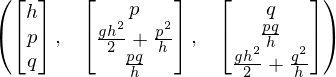

In [2]:
U = Matrix([h,p,q])
F = Matrix([p,p**2/h + g*h**2/2,p*q/h])
G = Matrix([q,p*q/h,q**2/h + g*h**2/2])
U,F,G

Define the Euler Jacobians

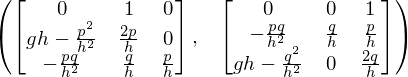

In [3]:
A = simplify(F.jacobian(U))
B = simplify(G.jacobian(U))
A,B

Or, in terms of $h,u,v$

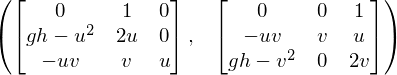

In [4]:
A_prim=simplify(A.subs(p,h*u).subs(q,h*v))
B_prim=simplify(B.subs(p,h*u).subs(q,h*v))
A_prim,B_prim

Now, calulate the eigenvalues and eigenvectors for the Euler Jacobians

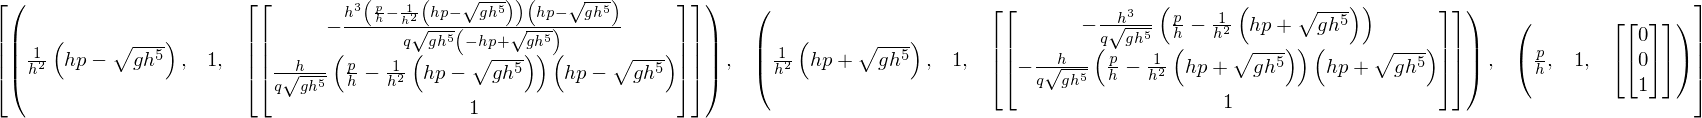

In [5]:
EA = A.eigenvects(simplify=True)
EA

eigenvects returns triples of the eigenvalue, multiplicity and the eigenvector. Let's extract the eigenvalues and simplify

In [6]:
lambdaA=[EA[0][0],EA[1][0],EA[2][0]]
lambdaA=[simplify(ea.subs(p,h*u).subs(sqrt(g*h**5),h**2*c)) for ea in lambdaA]
lambdaA

Let's build the matrix of eigenvectors $\mathbf{R}^x$ next

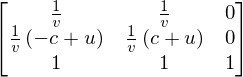

In [7]:
Rx = simplify(EA[0][2][0].row_join(EA[1][2][0]).row_join(EA[2][2][0]))
Rx = simplify(Rx.subs(p,h*u).subs(sqrt(g*h**5),h**2*c).subs(q,h*v))
Rx

The inverse is

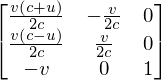

In [8]:
RxI = simplify(Rx.inv())
RxI

Sanity check

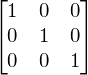

In [9]:
simplify(RxI*Rx)

Checking that it diagonalizes $\mathbf{A}$. That is, $\mathbf{\Lambda}^x = \mathbf{R}^{x,-1}\mathbf{A}\mathbf{R}^x$

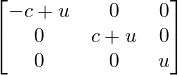

In [10]:
Lx=RxI*A*Rx
Lx = simplify(Lx.subs(p,h*u).subs(g*h,c**2).subs(q,h*v))
Lx


Now, we repeat the same process for $\mathbf{B}$

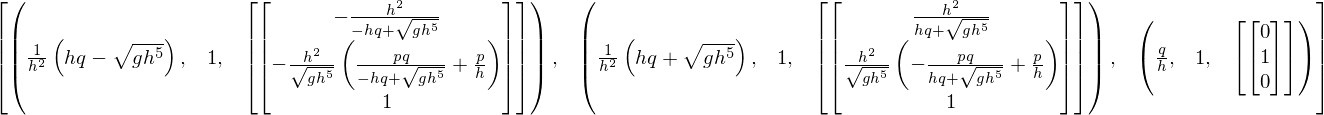

In [11]:
EB = B.eigenvects(simplify=True)
EB

In [12]:
lambdaB=[EB[0][0],EB[1][0],EB[2][0]]
lambdaB=[simplify(eb.subs(q,h*v).subs(sqrt(g*h**5),h**2*c)) for eb in lambdaB]
lambdaB

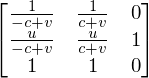

In [13]:
Ry = simplify(EB[0][2][0].row_join(EB[1][2][0]).row_join(EB[2][2][0]))
Ry = simplify(Ry.subs(p,h*u).subs(sqrt(g*h**5),h**2*c).subs(q,h*v))
Ry

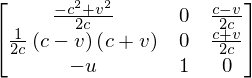

In [14]:
RyI = simplify(Ry.inv())
RyI

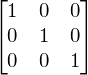

In [15]:
simplify(RyI*Ry)

Checking again that $\mathbf{R}^y$ diagonalizes, $\mathbf{B}$. That is, $\mathbf{\Lambda}^{y} = \mathbf{R}^{y,-1}\mathbf{B}\mathbf{R}^y$

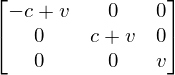

In [16]:
Ly=RyI*B*Ry
Ly = simplify(Ly.subs(p,h*u).subs(g*h,c**2).subs(q,h*v))
Ly


###Now we move to defining $\hat{\mathbf{A}}$ and $\hat{\mathbf{B}}$

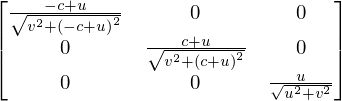

In [17]:
LambdaX = Matrix([[lambdaA[0]/sqrt(lambdaA[0]**2 + v**2),0,0],
                  [0,lambdaA[1]/sqrt(lambdaA[1]**2+v**2),0],
                  [0,0,lambdaA[2]/sqrt(lambdaA[2]**2+v**2)]])
LambdaX

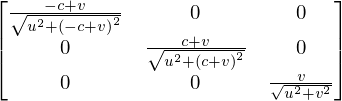

In [18]:
LambdaY = Matrix([[lambdaB[0]/sqrt(lambdaB[0]**2 + u**2),0,0],
                  [0,lambdaB[1]/sqrt(lambdaB[1]**2+u**2),0],
                  [0,0,lambdaB[2]/sqrt(lambdaB[2]**2+u**2)]])
LambdaY

Calculate
\begin{align}
\hat{\mathbf{A}}=\mathbf{R}^x\mathbf{\hat{\Lambda}}^x\mathbf{R}^{x,-1}
\end{align}

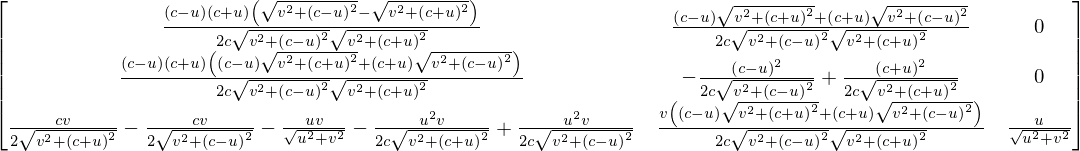

In [19]:
Ahat=Rx*LambdaX*RxI
Ahat=simplify(Ahat)
Ahat

Hmm, this doesn't look a lot like the $\mathbf{\hat{A}}$ defined in the code as far as I can tell. Trying to simplify a little bit

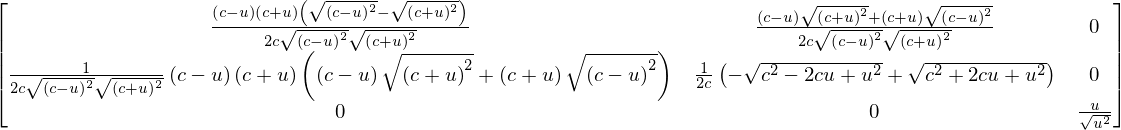

In [20]:
simplify(Ahat.subs(v,0))

Performing similar calculations for $\mathbf{\hat{B}}$
\begin{align}
\mathbf{\hat{B}}=\mathbf{R}^y\mathbf{\hat{\Lambda}}^y\mathbf{R}^{y,-1}
\end{align}

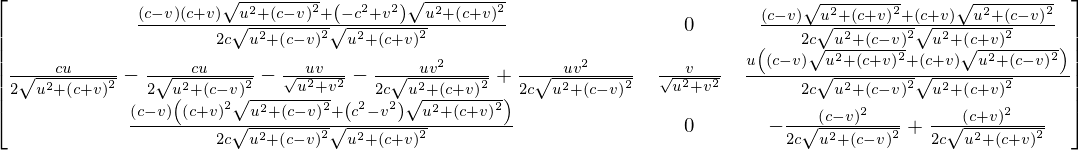

In [21]:
Bhat=Ry*LambdaY*RyI
Bhat=simplify(Bhat)
Bhat

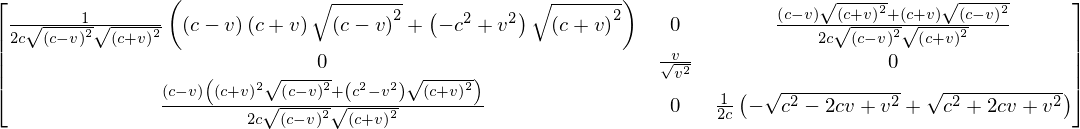

In [22]:
simplify(Bhat.subs(u,0).subs(sqrt(c**2 - 2*c*v + v**2),(c-v)).subs(sqrt(c**2 + 2*c*v + v**2),(c+v)))

These don't look very much like what appears to be used in the actual code (see below). First, let's double check the eigenvector matrices again

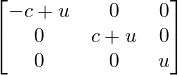

In [23]:
LambdaA = Matrix([[lambdaA[0],0,0],
                  [0,lambdaA[1],0],
                  [0,0,lambdaA[2]]])
LambdaA

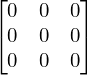

In [24]:
simplify(A-Rx*LambdaA*RxI).subs(p,u*h).subs(q,v*h).subs(c**2,g*h)

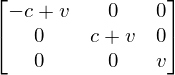

In [25]:
LambdaB = Matrix([[lambdaB[0],0,0],
                  [0,lambdaB[1],0],
                  [0,0,lambdaB[2]]])
LambdaB

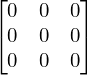

In [26]:
simplify(B-Ry*LambdaB*RyI).subs(p,u*h).subs(q,v*h).subs(c**2,g*h)

#Implementation of stabilized approximation in AdH
To check what is going on, I'll go back and look at the implementation of the SUPG approximation in AdH. Looking at the [Berger and Stockstill, 1995] formulation, we see that the additional SUPG stabilization terms can be written in the form
\begin{align}
\sum_{e}\left(\alpha \Delta x w_x, \mathbf{\hat{A}}\vec R\right)_{\Omega_e} + \sum_{e}\left(\alpha \Delta y w_y,\mathbf{\hat{B}}\vec R\right)_{\Omega_e}
\end{align}
where, $\vec R$ is a linearized strong residual, again $\alpha \in [0,0.5]$ and the integrations are carried out component-wise. 

We write $\vec R = [R_h,R_u,R_v]^{t}$ and $\mathbf{\hat{A}}$ as 
\begin{align}
\begin{array}{|ccc|}
\hat{A}_{hh} & \hat{A}_{hu} & \hat{A}_{hv} \\
\hat{A}_{uh} & \hat{A}_{uu} & \hat{A}_{uv} \\
\hat{A}_{vh} & \hat{A}_{vu} & \hat{A}_{vv} \\
\end{array}
\end{align}
The notation for $\mathbf{\hat{B}}$ is similar.

##Continuity
The stabilization terms in this case are 
\begin{align}
\left(\alpha \Delta x w_x,\hat{A}_{hh}R_h + \hat{A}_{hu}R_u + \hat{A}_{hv}R_v\right)_{e} + 
\left(\alpha \Delta y w_y,\hat{B}_{hh}R_h + \hat{B}_{hu}R_u + \hat{B}_{hv}R_v\right)_{e} &= \\
\alpha |\Omega_e| \left[\Delta x w_x \left(\frac{\bar{u}}{a}R_{h,e} + \frac{\bar{h}}{a}R_{u,e}\right) + 
 \Delta y w_y \left(\frac{\bar{v}}{a}R_{h,e} + \frac{\bar{h}}{a}R_{v,e}\right)\right]
\end{align}
where, $\bar{h}$, $\bar{u}$, and $\bar{v}$ represent averages over element $\Omega_e$
\begin{align}
\Delta x &= \Delta y = \sqrt{|\Omega_e|} \\
a &= \sqrt{\bar{u}^2 + \bar{v}^2 + c^2} \\
c &= \sqrt{g\bar{h}}
\end{align}
and the strong residuals are approximated as
\begin{align}
R_{h,e} & = \bar{h}^{n+1}-\bar{h}^n + \Delta t^{n+1}\left[\bar{u}h_x + \bar{h}u_x + \bar{v}h_y + \bar{h}v_y - s_r^{n+1}\right] \\
R_{u,e} & = \Delta t^{n+1}\left(\bar{u}u_x + \bar{v}u_y + gh_x z_x  
\right)\\
R_{v,e} & = \Delta t^{n+1}\left(\bar{u}v_x + \bar{v}v_y + gh_y z_y\right)
\end{align}
where I've neglected the friction terms for convenience

##$x$-momentum
Similarly, the $x$ momentum stabilization terms are
\begin{align}
\left(\alpha \Delta x w_x,\hat{A}_{uh}R_h + \hat{A}_{uu}R_u + \hat{A}_{uv}R_v\right)_{e} + 
\left(\alpha \Delta y w_y,\hat{B}_{uh}R_h + \hat{B}_{uu}R_u + \hat{B}_{uv}R_v\right)_{e} &= \\
\alpha |\Omega_e|\left[ \Delta x w_x \left(\frac{\bar{h}g}{a}R_{h,e} + \frac{\bar{h}\bar{u}}{a}R_{u,e}\right) + 
\Delta y w_y \frac{\bar{h}\bar{v}}{a}R_{u,e}\right]
\end{align}

##$y$-momentum
\begin{align}
\left(\alpha \Delta x w_x,\hat{A}_{vh}R_h + \hat{A}_{vu}R_u + \hat{A}_{vv}R_v\right)_{e} + 
\left(\alpha \Delta y w_y,\hat{B}_{vh}R_h + \hat{B}_{vu}R_u + \hat{B}_{vv}R_v\right)_{e} &= \\
\alpha |\Omega_e|\left[\Delta x w_x \frac{\bar{u}\bar{h}}{a}R_{v,e} + 
 \Delta y w_y \left(\frac{g\bar{v}}{a}R_{h,e} + \frac{\bar{h}\bar{v}}{a}R_{v,e}\right)\right]
\end{align}

In other words, we have $\mathbf{\hat{A}}$ approximated as
\begin{align}
\frac{1}{a}\begin{array}{|ccc|}
\bar{u} & \bar{h} & 0 \\
\bar{h}g & \bar{h}\bar{u} & 0\\
0 & 0 & \bar{u}\bar{h}\\
\end{array}
\end{align}
and $\mathbf{\hat{B}}$ is
\begin{align}
\frac{1}{a}\begin{array}{|ccc|}
\bar{v} & 0 & \bar{h}  \\
0 & \bar{h}\bar{v} & 0 \\
\bar{h}g & 0 & \bar{v}\bar{h}\\
\end{array}
\end{align}


##Initial implementation in Proteus
As a quick start, I've implemented a version of the AdH stabilization in the ```SW2D.py``` optimized module. I made a few minor changes to make it simpler to fit into the Proteus framework. Specifically, I'm using

\begin{align}
\sum_{e}\left(\alpha \Delta x w_x, \mathbf{\hat{A}}\vec R\right)_{\Omega_e} + \sum_{e}\left(\alpha \Delta y w_y,\mathbf{\hat{B}}\vec R\right)_{\Omega_e}
\end{align}
where the linearized strong residuals are approximated at each element quadrature point, $k$ as
\begin{align}
R_{h,k} & = \frac{h^{n+1}-h^n}{\Delta t^{n+1}} + u^nh_x + h^nu_x + v^nh_y + h^nv_y - s_r^{n+1} \\
R_{u,k} & = \frac{u^{n+1}h^{n+1}-u^nh^n}{\Delta t^{n+1}} + u^nu_x + v^nu_y + gh_x z_x  \\
R_{v,k} & = \frac{v^{n+1}h^{n+1}-v^nh^n}{\Delta t^{n+1}} + u^nv_x + v^nv_y + gh_y z_y
\end{align}
The matrix $\mathbf{\hat{A}}_k$ at each quadrature point is
\begin{align}
\frac{1}{a^n}\begin{array}{|ccc|}
u^n & h^n & 0 \\
h^ng & h^nu^n & 0\\
0 & 0 & u^nh^n\\
\end{array}
\end{align}
while $\mathbf{\hat{B}}_k$ is
\begin{align}
\frac{1}{a^n}\begin{array}{|ccc|}
v^n & 0 & h^n  \\
0 & h^nv^n & 0 \\
h^ng & 0 & v^nh^n\\
\end{array}
\end{align}



###Initial results
Below are some plots comparing my attempted translation of AdH's stabilization to the approximation that was in the trunk of ```proteus-mprans``` before merging in the ```sw2d-fix``` branch. They are for the ```sw2d_hump_2d``` test problem with $g=1$, $\nu=10^{-8}$ and no shock-capturing. The initial condition (below) is a 'peak' of water of height 9, and zero velocicty. The four boundaries are modelled as walls (no flux). Backward Euler is used with a target Courant number of 1/3.

The plots below show $h$ colored by the magnitude of velocity for four different approximations. From left to right, they are SUPG stabilization, SUPG plus shock-capturing, the original stabilization, and the original stabilization plus shock-capturing.

The shock-capturing used is isotropic with a coefficient
\begin{align}
\nu_c &= 0.5h_e\left(R_u^2 + R_v^2\right)^{1/2} 
\end{align}
where $h_e$ is the element diameter. It is applied to the momentum equations only. That is, we add a term
\begin{align}
\sum_{e}\left(\nu^n_cu^{n+1}_x,w_x\right)_e
\end{align}
to the $x$-momentum equation. The $y$-momentum equation is analgous.

From on the results, it looks like the SUPG stabilization is working somewhat. The results with the original stabilization and shock-capturing look better than the original stabilization alone but not as good as the SUPG stabilization or SUPG plus shock-capturing.

T=0.


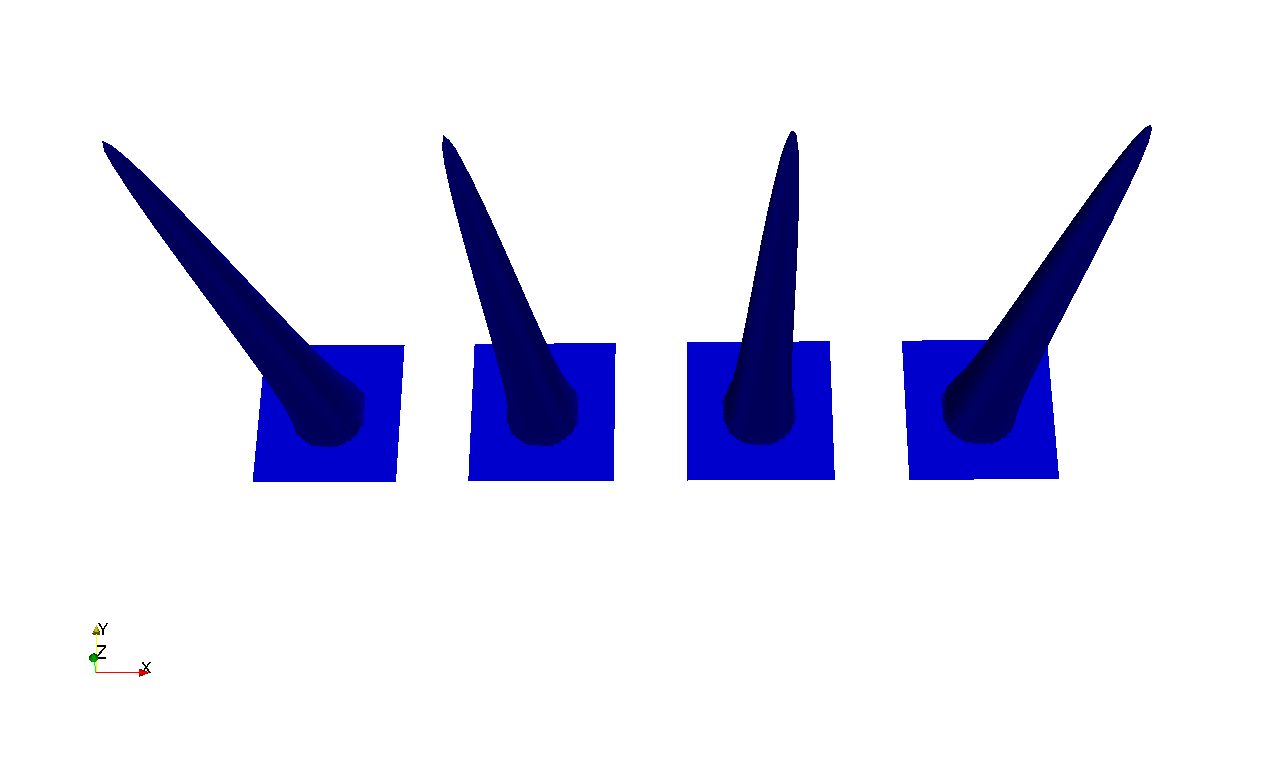

In [27]:
from IPython.display import Image
print "T=0."
imwidth='800px'
Image(filename='figures/adh-stab/supg_vs_orig_nu1m8_T0.png',width=imwidth)



T=0.2487


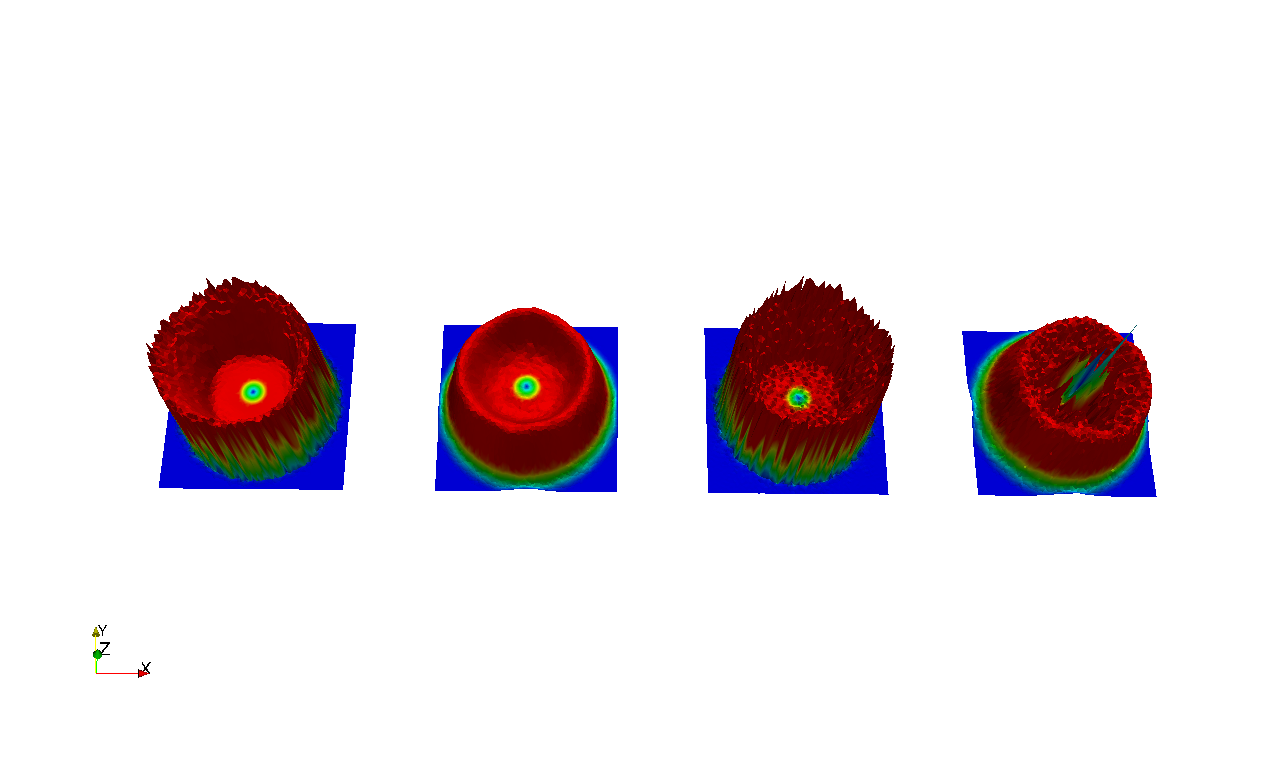

In [28]:
print "T=0.2487"
Image(filename='figures/adh-stab/supg_vs_orig_nu1m8_T0_2487.png',width=imwidth)



T=0.5222


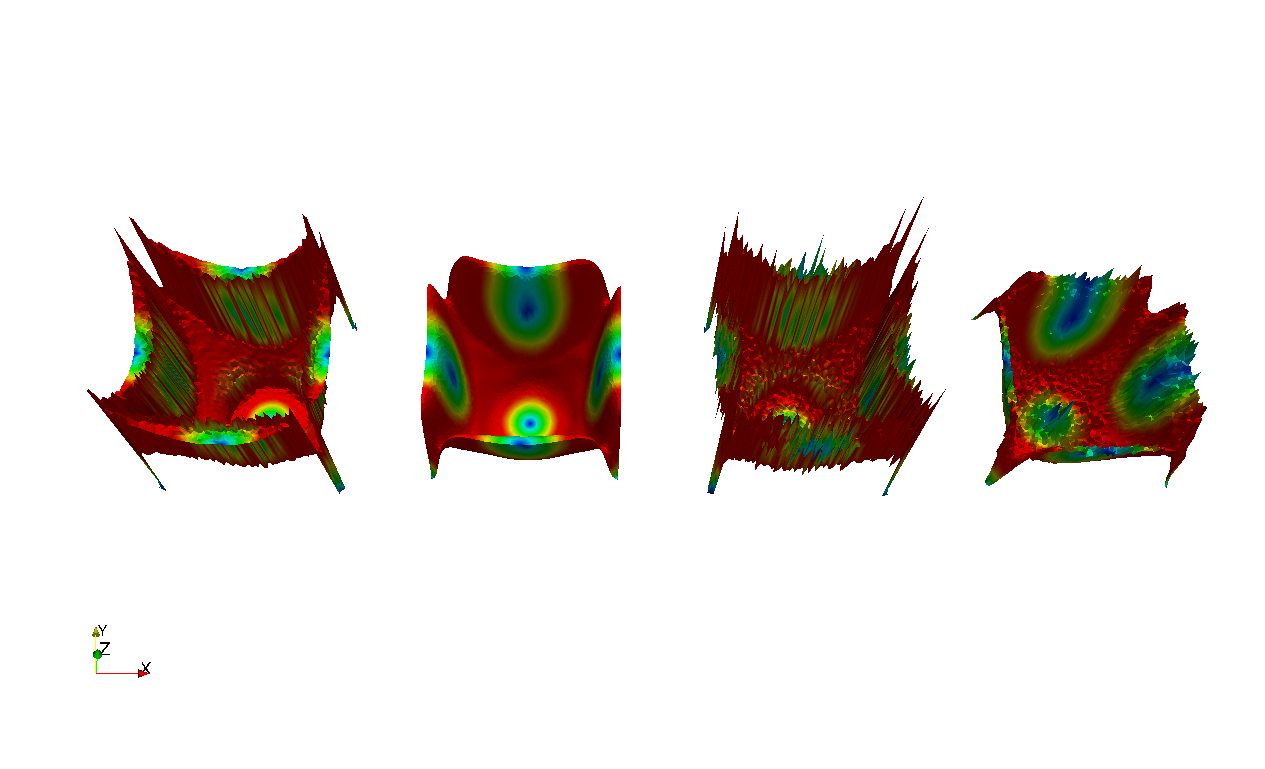

In [29]:
print "T=0.5222"
Image(filename='figures/adh-stab/supg_vs_orig_nu1m8_T0_522.png',width=imwidth)

T=1.01


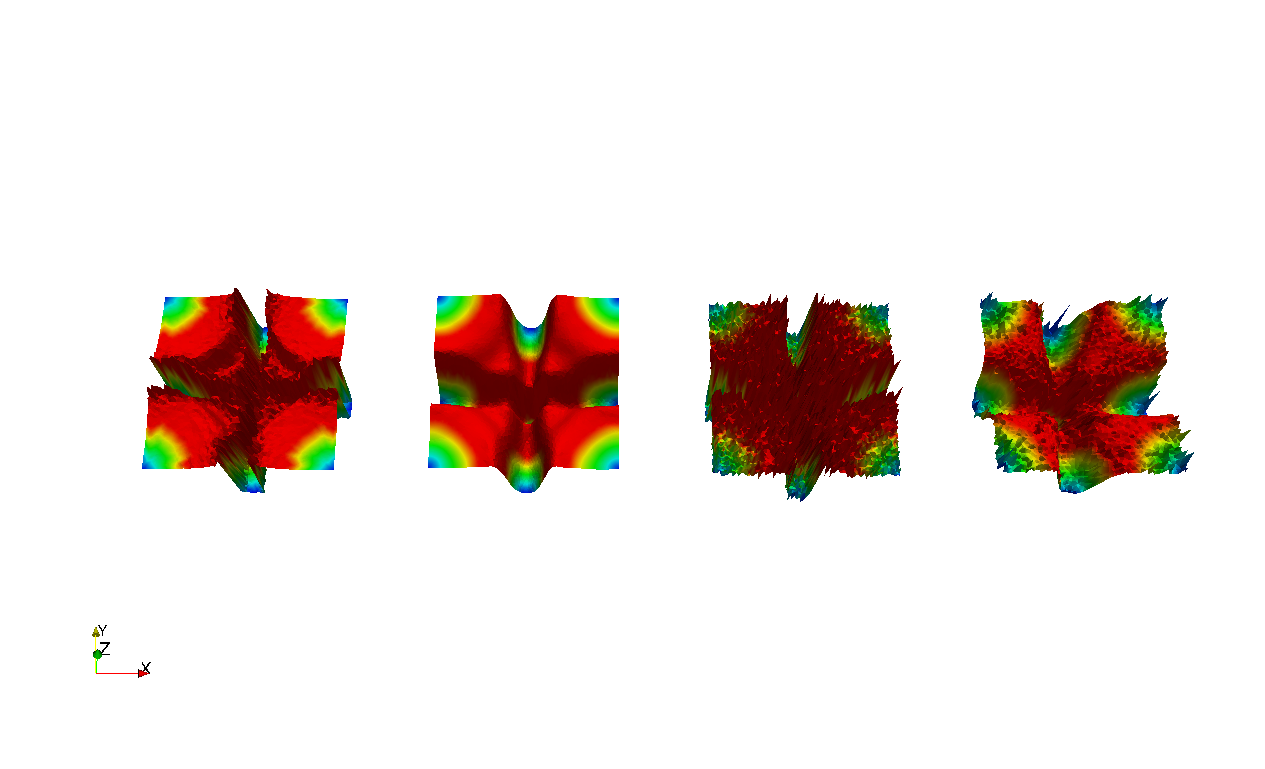

In [30]:
print "T=1.01"
Image(filename='figures/adh-stab/supg_vs_orig_nu1m8_T1_01.png',width=imwidth)

T=1.99


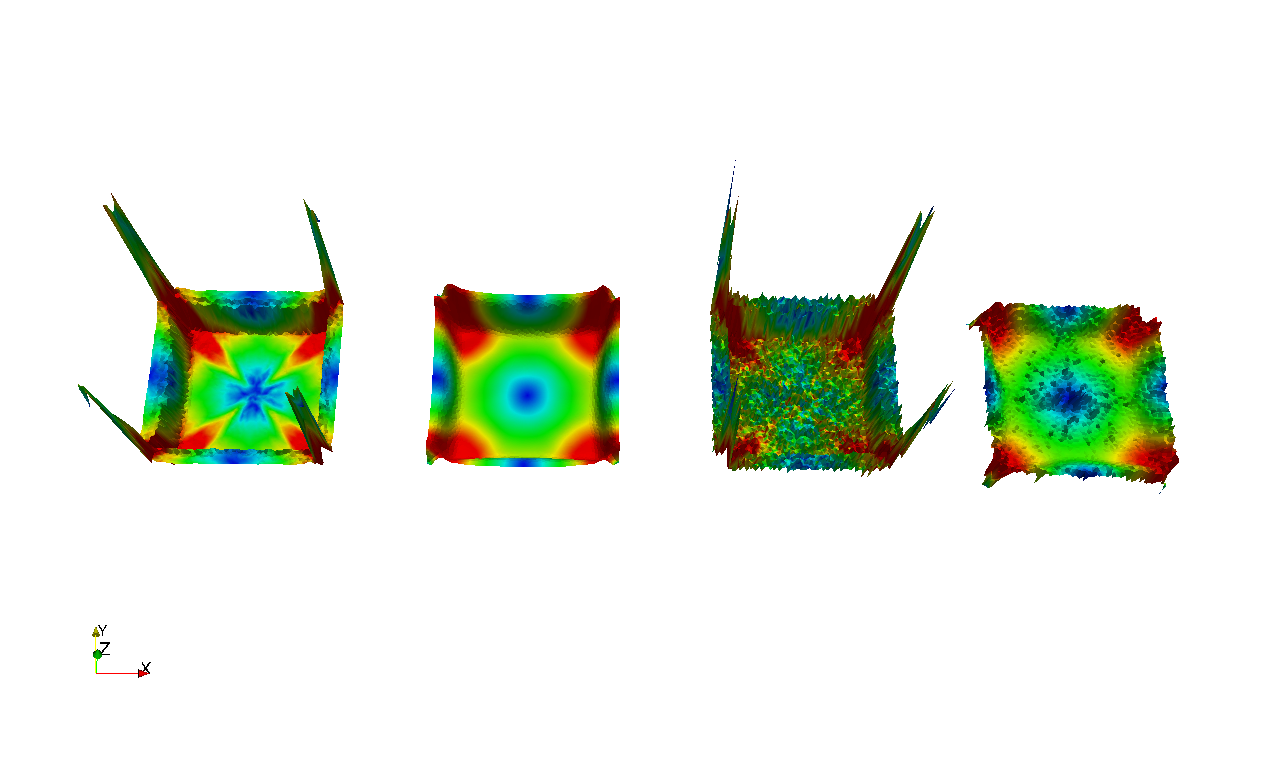

In [31]:
print "T=1.99"
Image(filename='figures/adh-stab/supg_vs_orig_nu1m8_T1_99.png',width=imwidth)

T=3.00


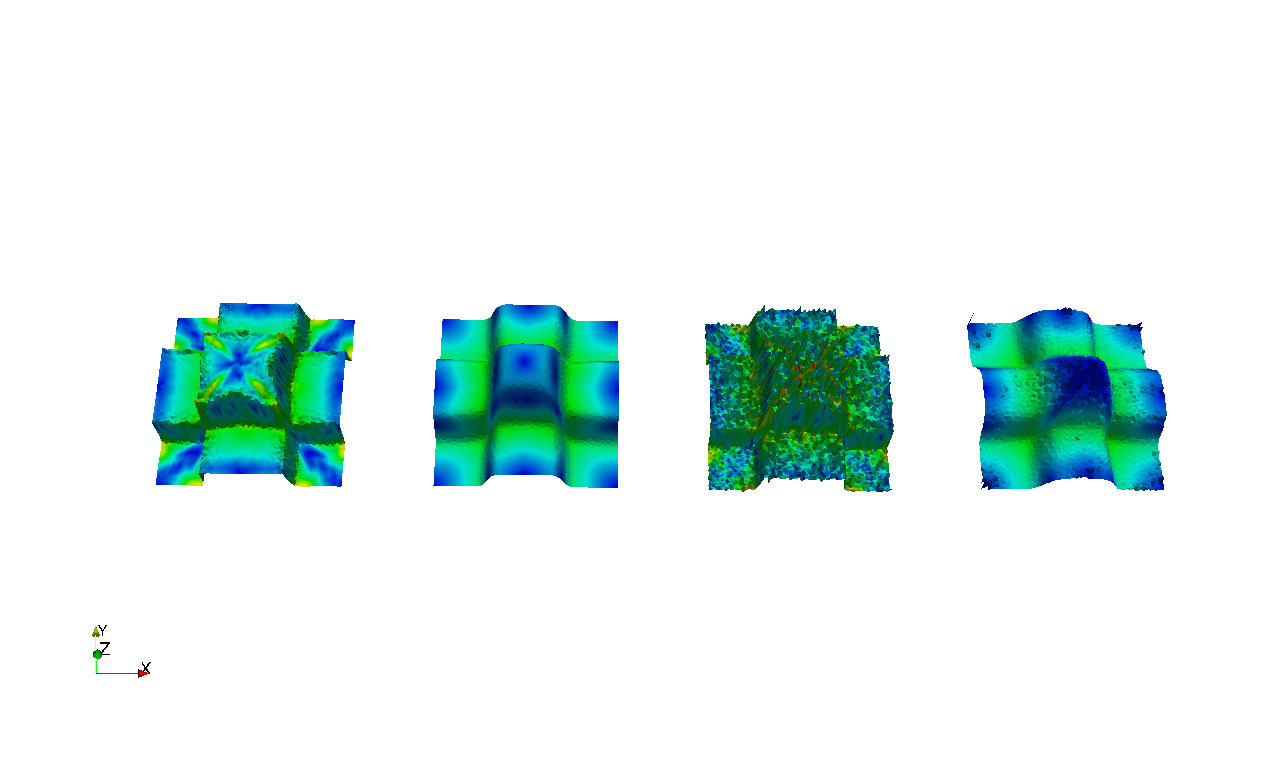

In [32]:
print "T=3.00"
Image(filename='figures/adh-stab/supg_vs_orig_nu1m8_T3_00.png',width=imwidth)

T=4.00


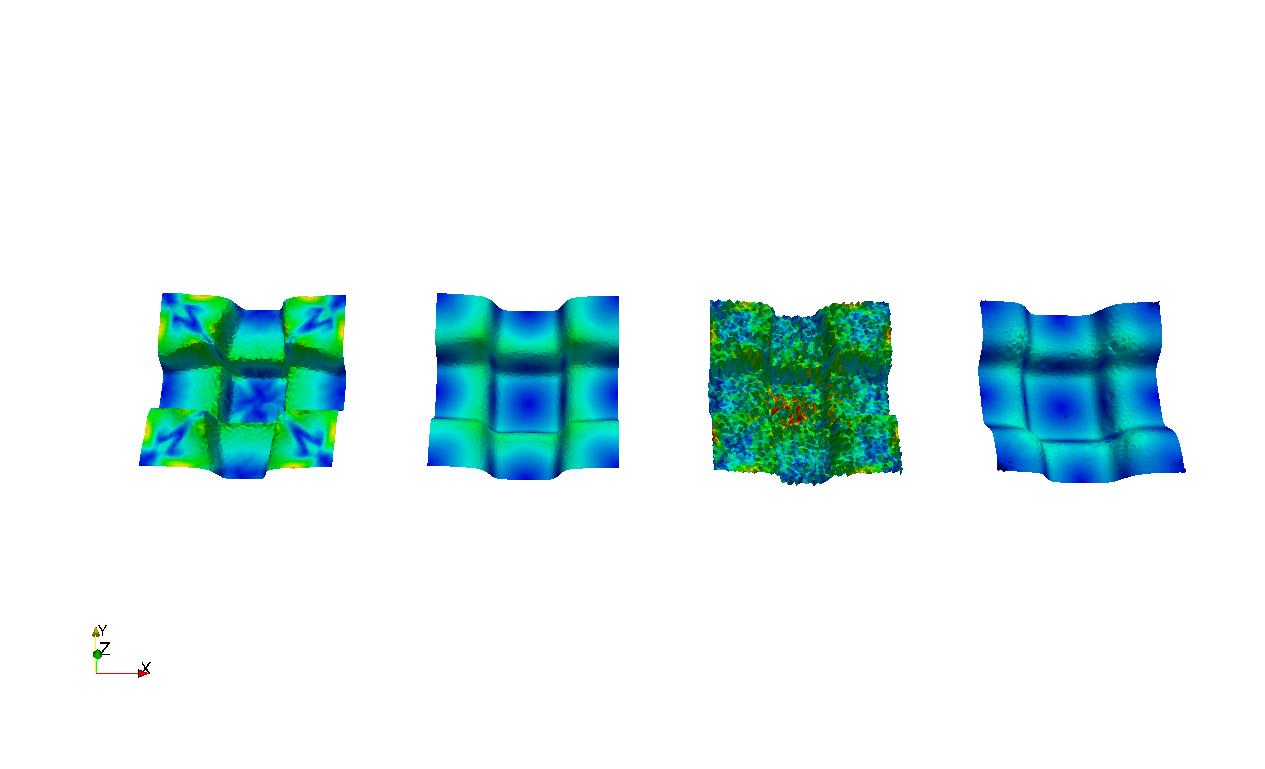

In [33]:
print "T=4.00"
Image(filename='figures/adh-stab/supg_vs_orig_nu1m8_T4_00.png',width=imwidth)

T=4.2786


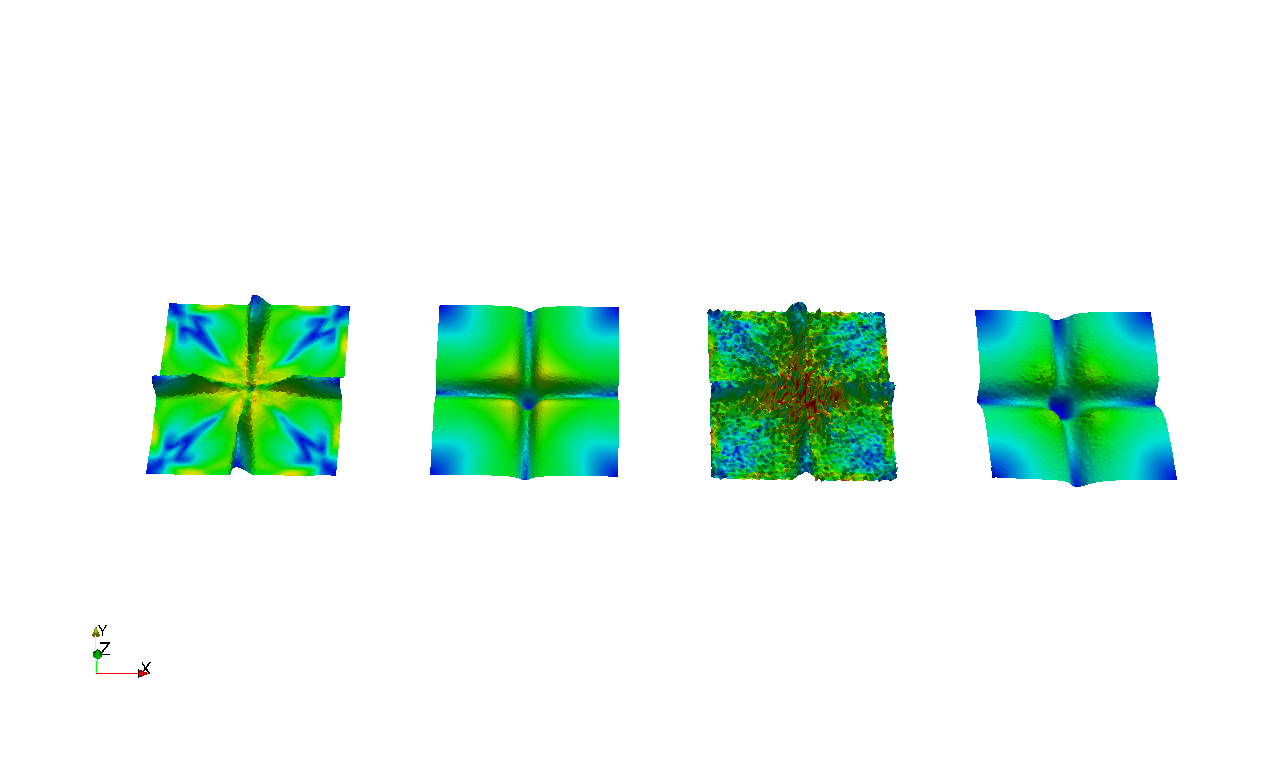

In [34]:
print "T=4.2786"
Image(filename='figures/adh-stab/supg_vs_orig_nu1m8_T4_2786.png',width=imwidth)

T=5.00


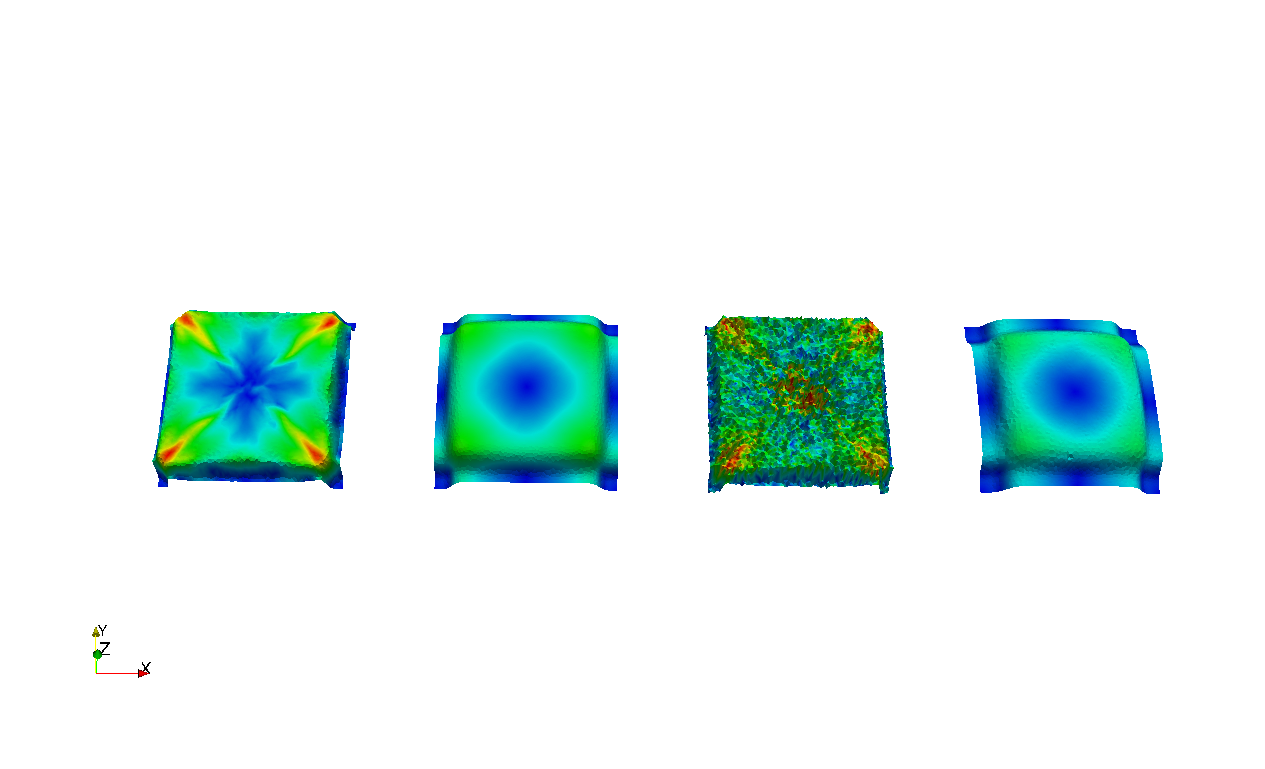

In [35]:
print "T=5.00"
Image(filename='figures/adh-stab/supg_vs_orig_nu1m8_T5.png',width=imwidth)